# Tokenization adn Normalization

In [46]:
import json
import os
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer


In [47]:
# nltk count words
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
# Load the data
# Load the data from the JSON file
data_path = './data/reddit_jokes.json'
with open(data_path) as f:
    data = json.load(f)

In [49]:
# create pandas dataframe of the data
df = pd.DataFrame(data)
df.head()

body      id  score  \
0  Now I have to say "Leroy can you please paint ...  5tz52q      1   
1  Pizza doesn't scream when you put it in the ov...  5tz4dd      0   
2  ...and being there really helped me learn abou...  5tz319      0   
3  A Sunday school teacher is concerned that his ...  5tz2wj      1   
4  He got caught trying to sell the two books to ...  5tz1pc      0   

                                               title  
0   I hate how you cant even say black paint anymore  
1  What's the difference between a Jew in Nazi Ge...  
2                     I recently went to America....  
3  Brian raises his hand and says, “He’s in Heaven.”  
4  You hear about the University book store worke...

In [50]:
# NOTE: bit more than 1000 jokes for removing duplicates and empty jokes
num_good = 1046
num_bad = 1033
min_score = 50


df_sroted = df.sort_values(by='score', ascending=False)
df_sroted = df_sroted.reset_index(drop=True)

df_good = df_sroted.head(num_good)
df_good = df_good.reset_index(drop=True)

df_bad = df_sroted[df_sroted['score'] > min_score].tail(num_bad)
df_bad = df_bad.reset_index(drop=True)

In [51]:
# avg score and shape
print('avg score good jokes:', df_good['score'].mean().round(2), 'shape:', df_good.shape)
print('avg score bad jokes:', df_bad['score'].mean().round(2), 'shape:', df_bad.shape)

avg score good jokes: 10731.98 shape: (1046, 4)
avg score bad jokes: 52.32 shape: (1033, 4)


In [52]:
# print random 5 good jokes
print('#' * 100)
print('5 random good jokes:')
print('#' * 100)
for i in range(5):
    print(df_good['title'][np.random.randint(0, num_good)])
    print(df_good['body'][np.random.randint(0, num_good)])
    print('-' * 100)

####################################################################################################
5 random good jokes:
####################################################################################################
I told my wife we can have sex or go see Star Wars, she said, I'm on my period and Star Wars is sold out.
....what happens next will shock you."
----------------------------------------------------------------------------------------------------
Two men from Texas were sitting at a bar
"No way. That's impossible!" she said.

"Trust me," I said, "I have no idea where our baby is."
----------------------------------------------------------------------------------------------------
My wife always accuses me of having a favorite child.
...hands down.
----------------------------------------------------------------------------------------------------
If i got 50 cents for every failed math exam,
Two fleas had an arrangement to meet every winter in Miami for a vacation. La

In [53]:
# print random 5 bad jokes
print('#' * 100)
print('5 random bad jokes:')
print('#' * 100)
for i in range(5):
    print(df_bad['title'][np.random.randint(0, num_bad)])
    print(df_bad['body'][np.random.randint(0, num_bad)])
    print('-' * 100)

####################################################################################################
5 random bad jokes:
####################################################################################################
why dont they have drivers ed and sex ed on the same day in mexico?
As he was praying a black guy was walking nearby with groceries when he dropped his cheese wheel and it rolled to the Mexican. The Mexican grabbed it, praised god, and ran home. 

When he gets home he instructs his wife to make nachos with the cheese. 

"Why nachos" asks his wife "we can make so many better meals with this cheese"

"No" said the Mexican "god instructs me to make nachos."

"What do you mean" asked the wife 

"As I was praying God sent me the cheese wheel and as I was running home with it I heard him yelling That's Nacho cheese, that's nacho cheese!"
----------------------------------------------------------------------------------------------------
2 Priests go to the beach...
a navel.

In [ ]:
# tokenize the jokes
stop_words = set(stopwords.words('english'))

def sentinize(joke):
    tokens = sent_tokenize(joke)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Tokenize and lemmatize the jokes
df_good['tok_body'] = df_good['body'].apply(sentinize)
df_bad['tok_body'] = df_bad['body'].apply(sentinize)

df_good['tok_title'] = df_good['title'].apply(sentinize)
df_bad['tok_title'] = df_bad['title'].apply(sentinize)



print('shape after tokenizing:', df_good.shape, df_bad.shape)

shape after tokenizing: (1046, 6) (1033, 6)


In [ ]:
def rem_null_dubl(df):
    # Remove rows where 'tok_body' or 'tok_title' is empty
    df = df[df['tok_body'].map(len) > 0]
    df = df[df['tok_title'].map(len) > 0]
    
    # Convert list-type columns to strings for deduplication
    df['tok_body_str'] = df['tok_body'].apply(lambda x: ' '.join(x))
    df['tok_title_str'] = df['tok_title'].apply(lambda x: ' '.join(x))
    
    # Remove rows where both 'tok_body' and 'tok_title' are duplicates
    df = df.drop_duplicates(subset=['tok_body_str', 'tok_title_str'], keep=False)
    
    # Drop the temporary string columns
    df = df.drop(columns=['tok_body_str', 'tok_title_str'])
    
    return df

df_good = rem_null_dubl(df_good)
df_bad = rem_null_dubl(df_bad)
print('shape after removing duplicates:', df_good.shape, df_bad.shape)

In [ ]:
df_good['tokens'] = df_good['tok_body'] + df_good['tok_title']
df_bad['tokens'] = df_bad['tok_body'] + df_bad['tok_title']

good jokes with more than 1 sentence: 576 total: 1008
bad jokes with more than 1 sentence: 477 total: 1016


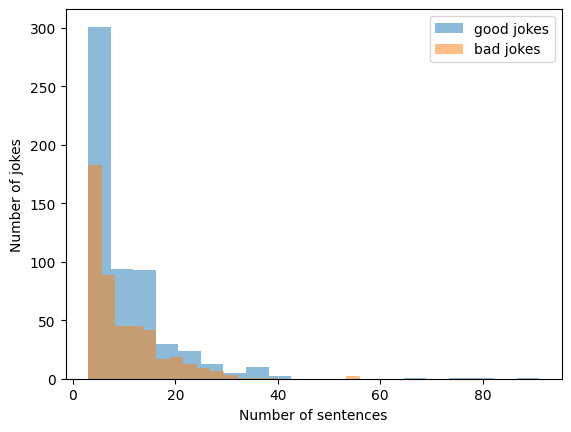

In [58]:
# plot avarage number of sentences in jokes
good_sent = df_good['tokens'].apply(len)
bad_sent = df_bad['tokens'].apply(len)

# bigger than 1
good_sent = good_sent[good_sent > 2]
bad_sent = bad_sent[bad_sent > 2]

# print how many jokes have more than 1 sentence relative to the total number of jokes
print('good jokes with more than 1 sentence:', good_sent.shape[0], 'total:', df_good.shape[0])
print('bad jokes with more than 1 sentence:', bad_sent.shape[0], 'total:', df_bad.shape[0])

plt.hist(good_sent, bins=20, alpha=0.5, label='good jokes')
plt.hist(bad_sent, bins=20, alpha=0.5, label='bad jokes')
plt.xlabel('Number of sentences')
plt.ylabel('Number of jokes')
plt.legend()
plt.show()

# Find Patterns
use tok_title and tok_body for it

## Oneliner

## Questions -> Answer

## Wordplay 

## Dialog


## Knock-Knock Jokes